In [1]:
# introduction
# what is the coefficients of you regression model are correlated across samples?

# can we model them using a GMM or something?

In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close();
plt.rcParams.update({'font.size':16})
import numpy as np

<Figure size 432x288 with 0 Axes>

In [3]:
def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

In [4]:
def forward_rotation(M, theta):
    rot_matrix = rotation_matrix(theta)
    return rot_matrix @ M @ rot_matrix.T

In [5]:
def build_data_set(size, theta=0, mean=np.array([10, -4])):
    """
    linear dataset with two free parameters, intercept and slope.
    However, they are correlated with hyperparameter label (i.e. equivalent to something like mass-ratio `q`)
    
    
    the mean will be fixed to (0,0) however, the covariance matrix
    will depend on q
    
    """
    
    # true
    cov = [[1,0.9], [0.9,1]]
    
    r_cov = forward_rotation(cov, theta)
    
    betas = np.random.multivariate_normal(mean, r_cov, size) # size,2
    
    x = np.linspace(0, 1, 500)[:,np.newaxis] # 100,1
    y = betas[:,0] + betas[:,1]*x
    y = y.T
    
    return x, y, betas
    

In [6]:
size=1000
xs=[]
ys=[]
betas=[]

mean=np.array([10, -4])

# thetas = [0, 40, 60, 100]
thetas = np.linspace(0, 100, 20)
thetas = np.around(thetas, 4)

qs = np.arange(len(thetas))
for i, theta in enumerate(thetas):
    mean = [10 * i * 0.1, -4 * i + 2*i**2 * 0.1]
    
    x_, y_, betas_ = build_data_set(size, theta=theta * np.pi/180, mean=mean)
    xs.append(x_)
    ys.append(y_)
    betas.append(betas_)

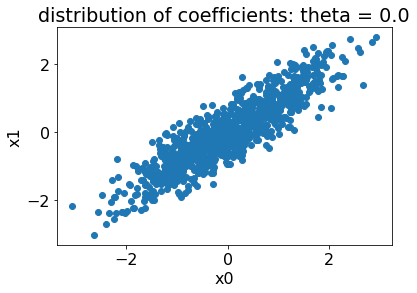

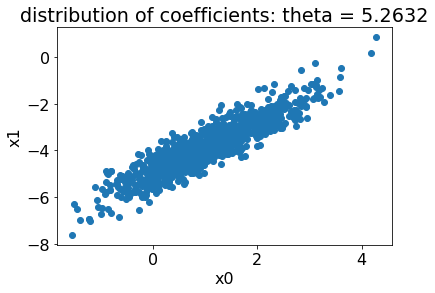

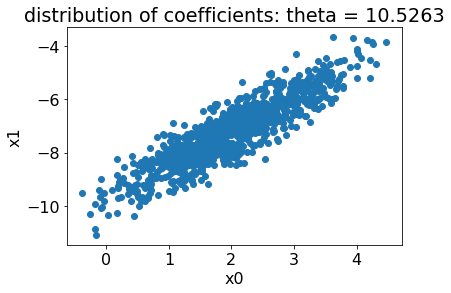

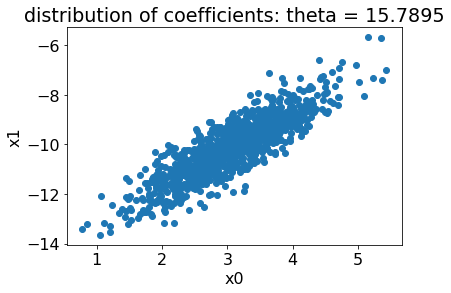

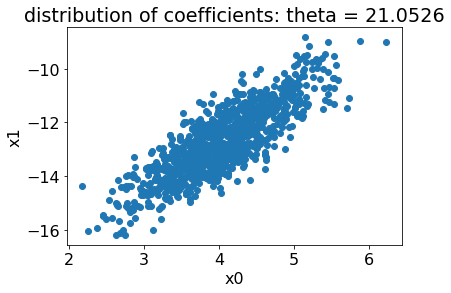

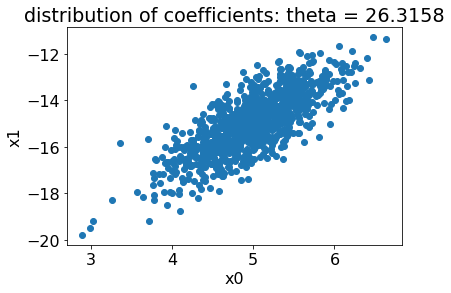

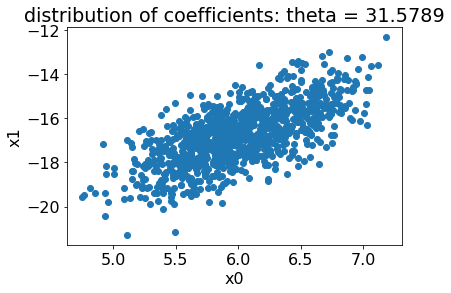

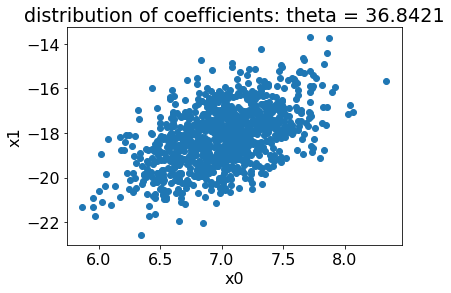

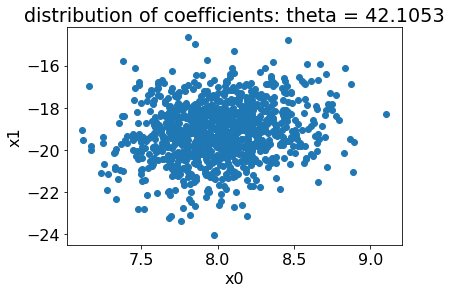

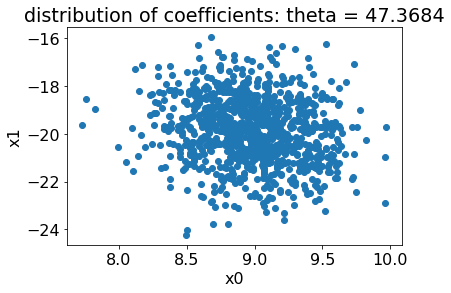

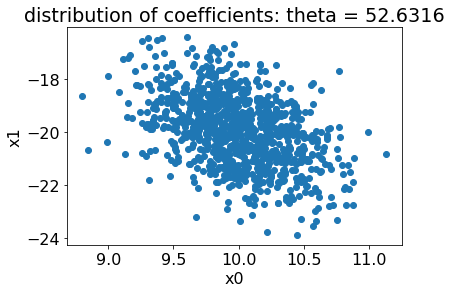

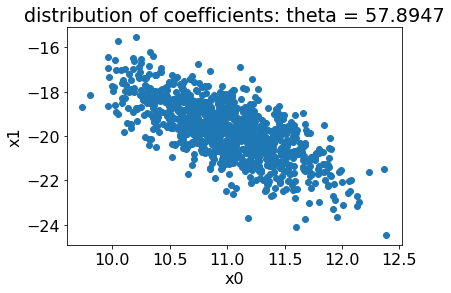

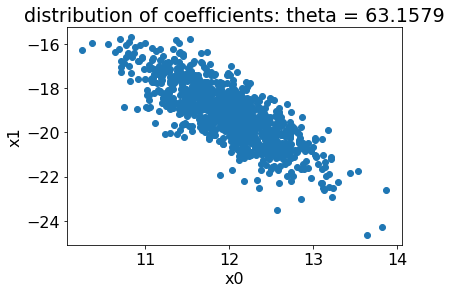

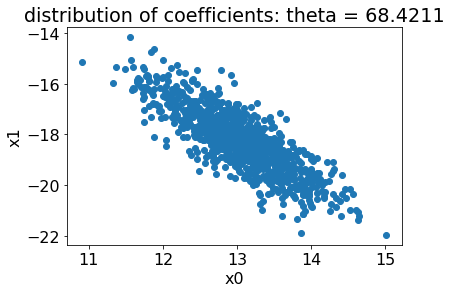

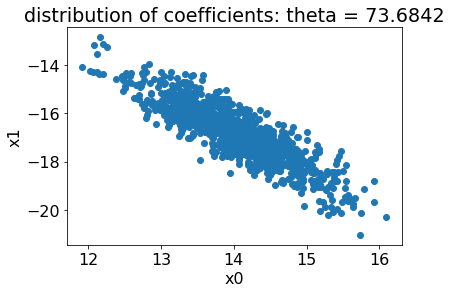

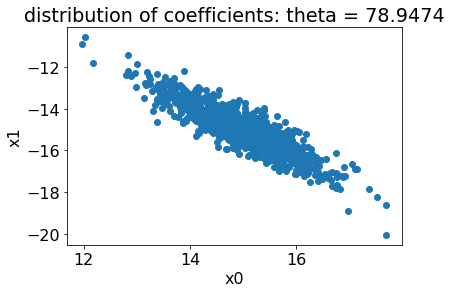

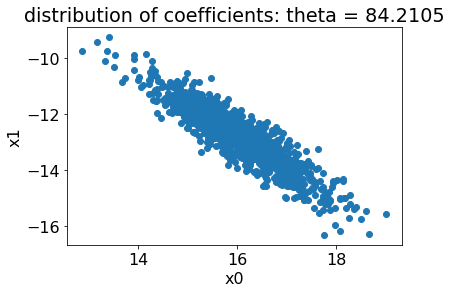

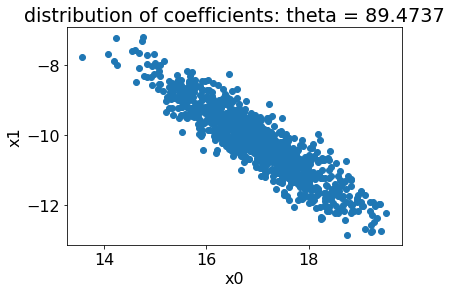

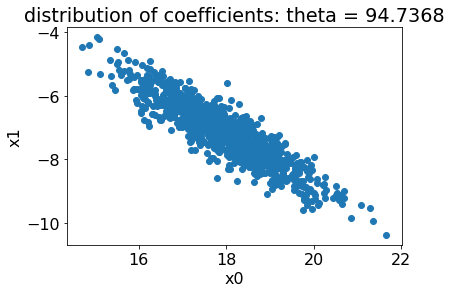

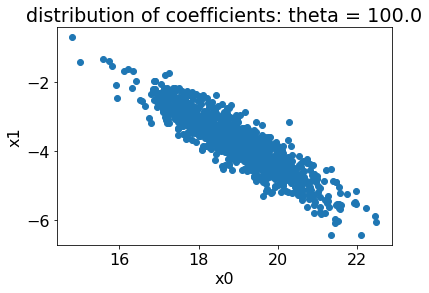

In [7]:
for i in range(len(thetas)):
    plt.figure()
    plt.scatter(betas[i][:,0], betas[i][:,1])
    plt.title(f'distribution of coefficients: theta = {thetas[i]}')
    plt.xlabel('x0')
    plt.ylabel('x1')

In [8]:
xs[0].shape

(500, 1)

In [9]:
ys[0].shape

(1000, 500)

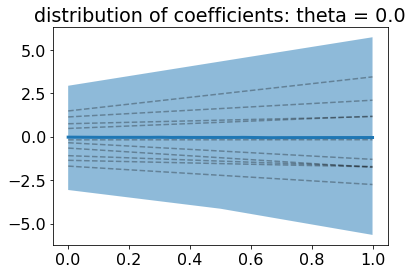

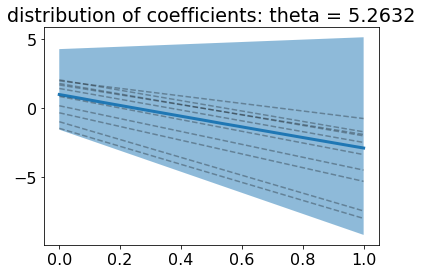

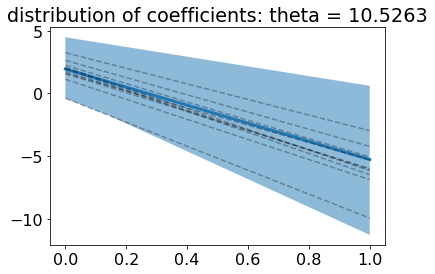

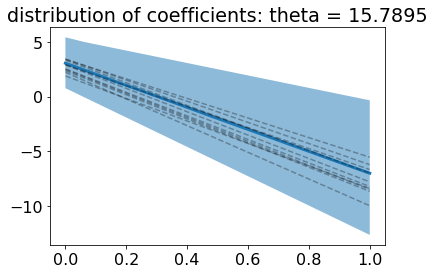

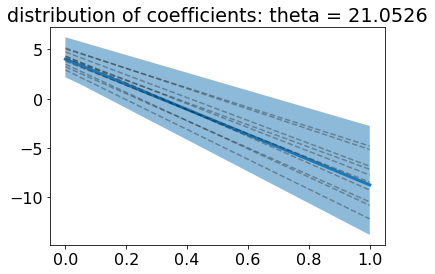

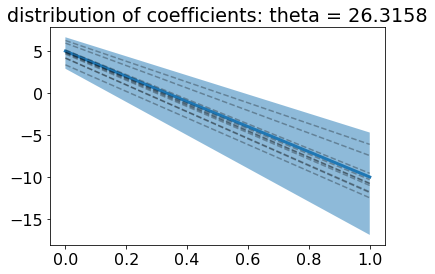

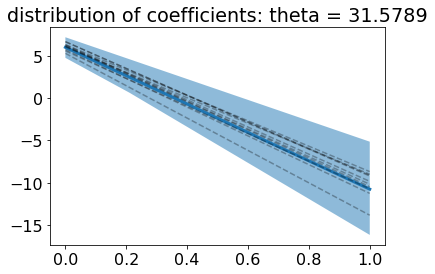

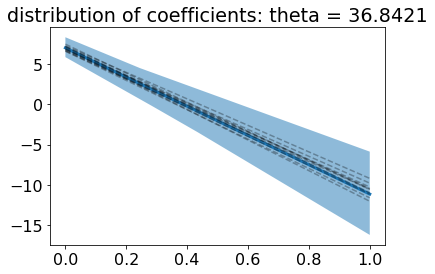

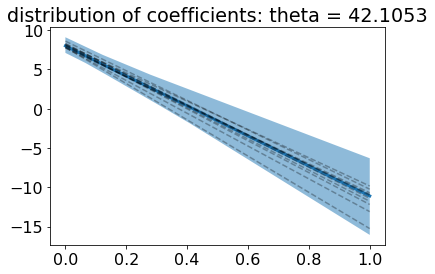

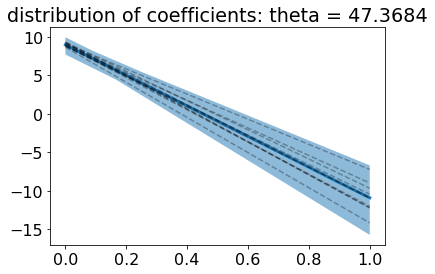

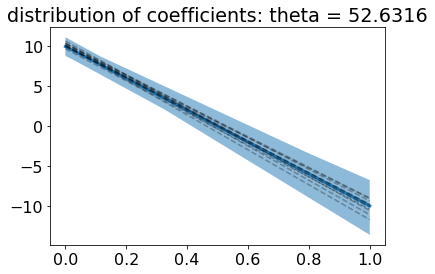

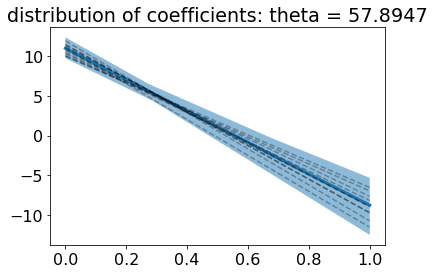

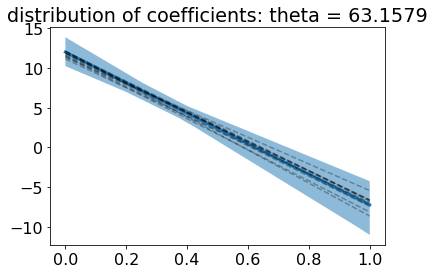

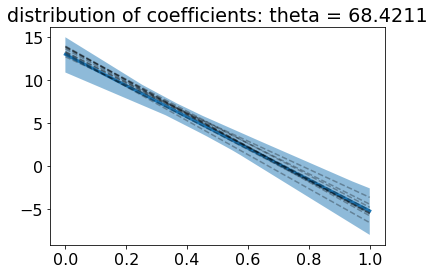

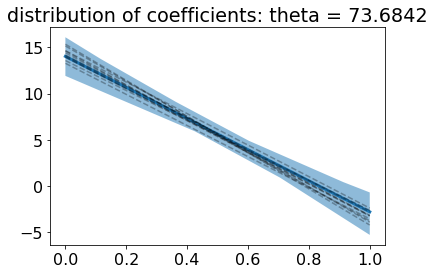

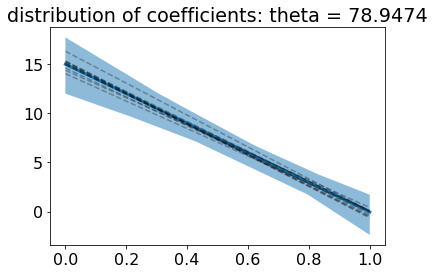

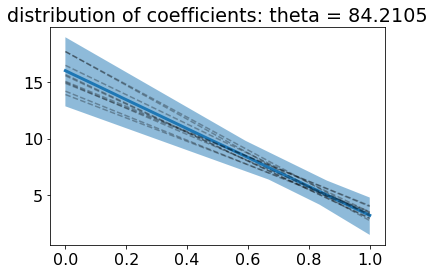

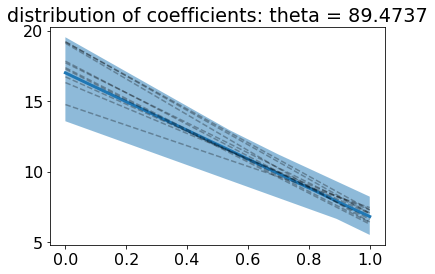

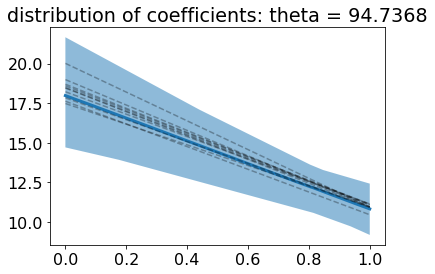

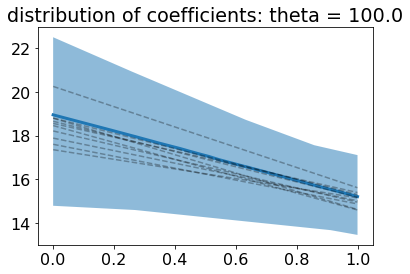

In [10]:
for i in range(len(thetas)):
    plt.figure()
    plt.plot(xs[i], np.median(ys[i], 0), lw=3)
    plt.plot(xs[i], ys[i][:10].T, ls='--', c='k', alpha=0.3)
    plt.fill_between(xs[i][:,0], y1=np.min(ys[i],0), y2=np.max(ys[i],0), alpha=0.5)
    plt.title(f'distribution of coefficients: theta = {thetas[i]}')
    plt.show()
    plt.close()

In [11]:
from sklearn.mixture import GaussianMixture

In [12]:
gmm = GaussianMixture(n_components=1).fit(betas[0])

In [13]:
gmm.means_

array([[0.01906708, 0.02427992]])

In [14]:
gmm.covariances_

array([[[0.95714113, 0.85153591],
        [0.85153591, 0.95572007]]])

In [15]:
gmm.weights_

array([1.])

In [16]:
samples = gmm.sample(size)[0]

Text(0, 0.5, 'x1')

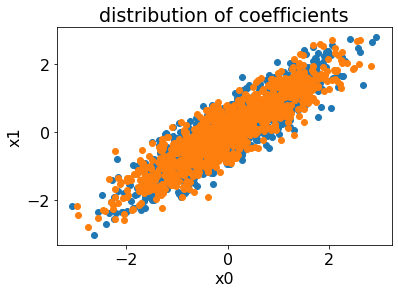

In [17]:
plt.scatter(betas[0][:,0], betas[0][:,1])
plt.scatter(samples[:,0], samples[:,1])
plt.title('distribution of coefficients')
plt.xlabel('x0')
plt.ylabel('x1')

In [18]:
from sklearn.mixture import GaussianMixture

In [19]:
betas=np.asarray(betas)

In [20]:
betas.shape

(20, 1000, 2)

In [21]:
import pandas as pd

In [22]:
betas[0]

array([[-1.36229896, -0.37838593],
       [ 1.47693827,  1.96101816],
       [-0.65872893, -1.10887065],
       ...,
       [-1.21678931, -0.79022647],
       [-0.39742667, -0.22440603],
       [-0.57717465,  0.35096961]])

In [23]:
df_all = []
for i in range(len(thetas)):
    df = pd.DataFrame({'x0':betas[i][:,0], 'x1':betas[i][:,1]})
    df['q'] = qs[i]
    df_all.append(df)

In [24]:
df_all = pd.concat(df_all)

In [25]:
df_all

x0        x1   q
0    -1.362299 -0.378386   0
1     1.476938  1.961018   0
2    -0.658729 -1.108871   0
3     1.132815  0.962112   0
4    -0.350594 -0.956324   0
..         ...       ...  ..
995  17.209122 -2.586899  19
996  19.395993 -4.710890  19
997  18.122329 -2.980905  19
998  20.259011 -4.750051  19
999  20.320220 -4.397210  19

[20000 rows x 3 columns]

In [26]:
gmm_all = GaussianMixture(n_components=10).fit(df_all)

In [27]:
samples = pd.DataFrame(gmm_all.sample(size * len(thetas))[0], columns=df_all.columns)

In [28]:
samples['q'] = samples['q'].apply(round)

In [29]:
samples

x0         x1   q
0      13.527956 -17.858168  13
1      10.774825 -17.543241  12
2      14.323565 -17.012975  14
3      14.747926 -19.088110  13
4      13.871473 -16.099466  14
...          ...        ...  ..
19995  19.217830  -3.732504  19
19996  17.386531  -2.887120  19
19997  19.332205  -3.363207  19
19998  19.880978  -4.800337  19
19999  20.955947  -5.302107  19

[20000 rows x 3 columns]

<AxesSubplot:>

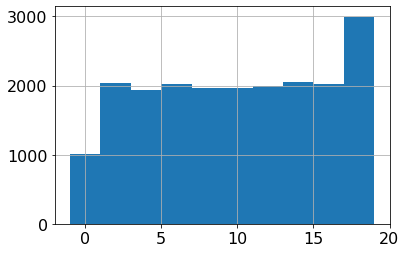

In [30]:
samples['q'].hist()

In [31]:
import corner

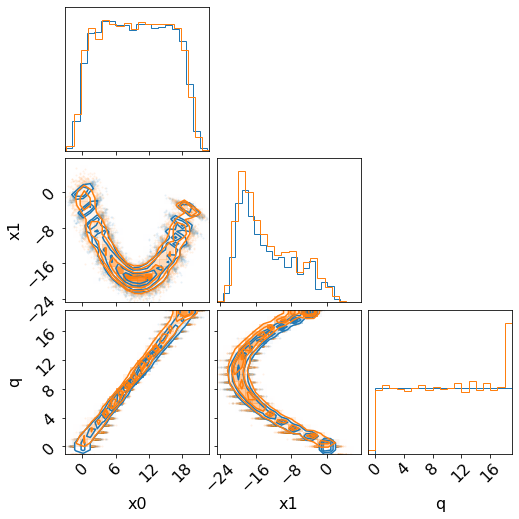

In [32]:
fig = corner.corner(df_all, color='C0');
corner.corner(samples, color='C1', fig=fig);

In [33]:
df_all

x0        x1   q
0    -1.362299 -0.378386   0
1     1.476938  1.961018   0
2    -0.658729 -1.108871   0
3     1.132815  0.962112   0
4    -0.350594 -0.956324   0
..         ...       ...  ..
995  17.209122 -2.586899  19
996  19.395993 -4.710890  19
997  18.122329 -2.980905  19
998  20.259011 -4.750051  19
999  20.320220 -4.397210  19

[20000 rows x 3 columns]

In [34]:
df_all.query('q==1')

x0        x1  q
0    0.855476 -4.215256  1
1    1.684109 -3.585287  1
2    1.427175 -3.907544  1
3    1.787286 -3.791399  1
4    1.981711 -2.731513  1
..        ...       ... ..
995 -0.867916 -4.987570  1
996  1.799379 -3.031790  1
997  0.567007 -4.058990  1
998  2.749470 -2.595429  1
999 -0.378615 -4.628344  1

[1000 rows x 3 columns]

q = 0


<Figure size 432x288 with 0 Axes>

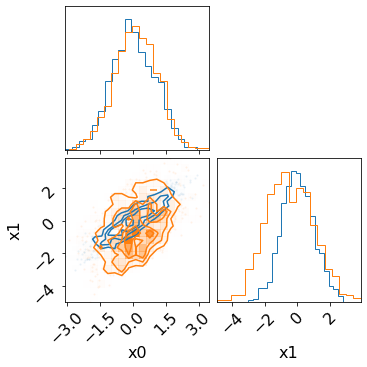

q = 1


<Figure size 432x288 with 0 Axes>

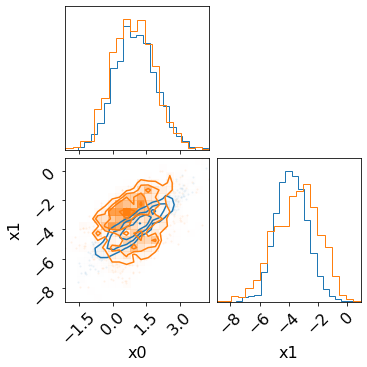

q = 2


<Figure size 432x288 with 0 Axes>

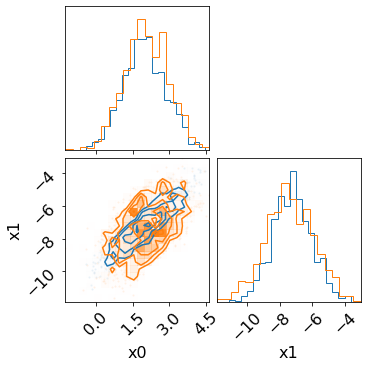

q = 3


<Figure size 432x288 with 0 Axes>

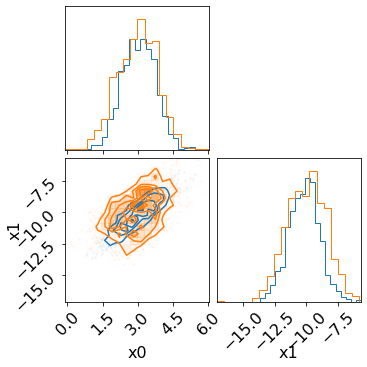

q = 4


<Figure size 432x288 with 0 Axes>

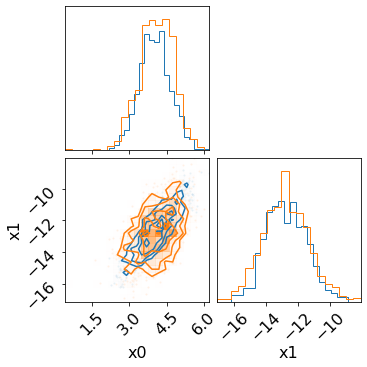

q = 5


<Figure size 432x288 with 0 Axes>

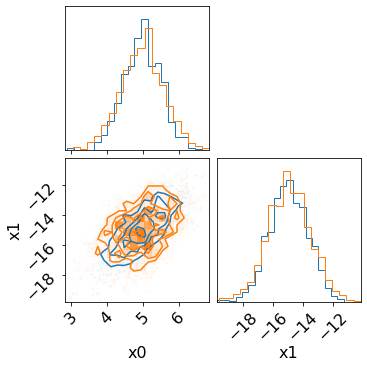

q = 6


<Figure size 432x288 with 0 Axes>

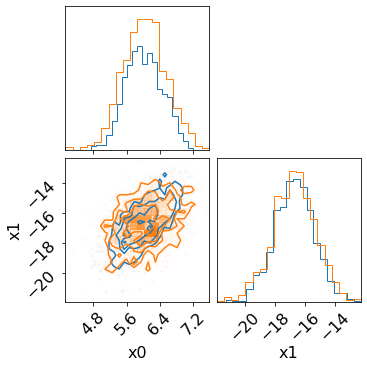

q = 7


<Figure size 432x288 with 0 Axes>

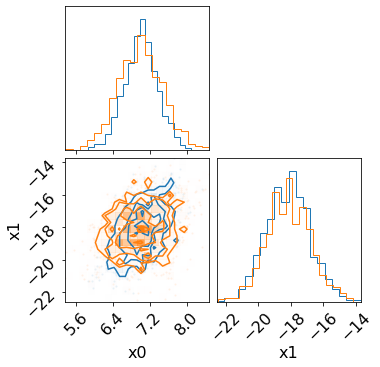

q = 8


<Figure size 432x288 with 0 Axes>

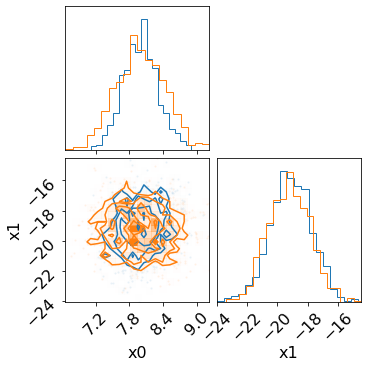

q = 9


<Figure size 432x288 with 0 Axes>

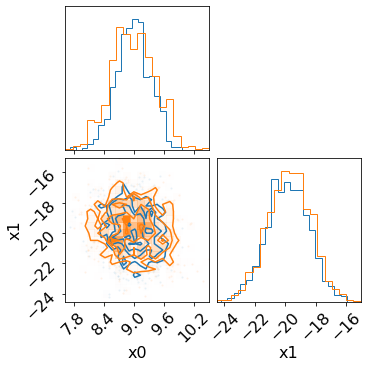

q = 10


<Figure size 432x288 with 0 Axes>

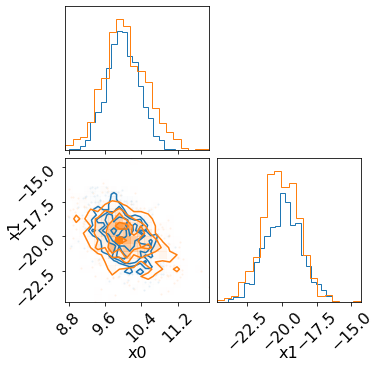

q = 11


<Figure size 432x288 with 0 Axes>

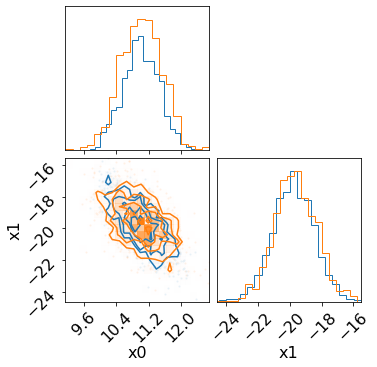

q = 12


<Figure size 432x288 with 0 Axes>

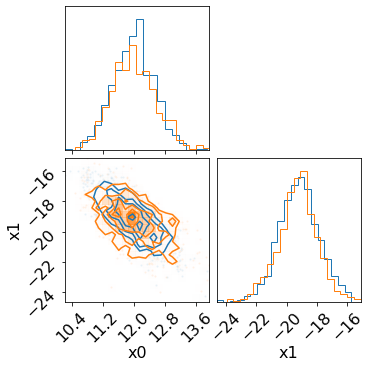

q = 13


<Figure size 432x288 with 0 Axes>

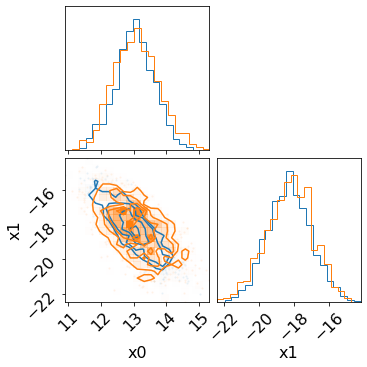

q = 14


<Figure size 432x288 with 0 Axes>

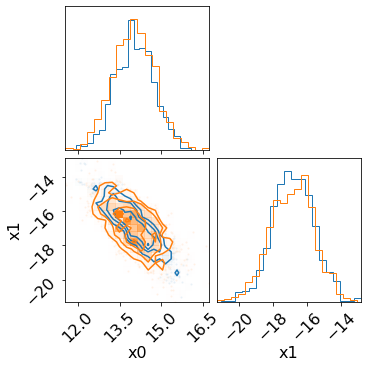

q = 15


<Figure size 432x288 with 0 Axes>

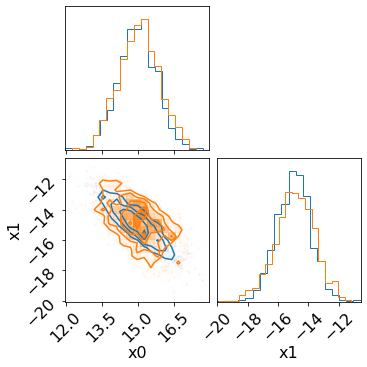

q = 16


<Figure size 432x288 with 0 Axes>

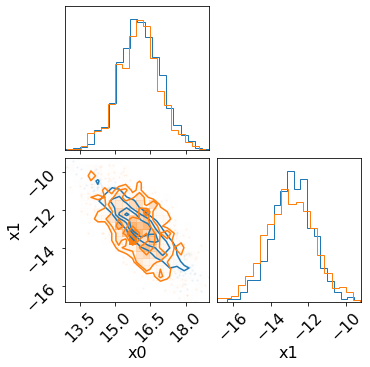

q = 17


<Figure size 432x288 with 0 Axes>

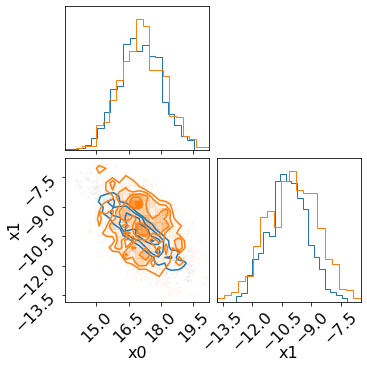

q = 18


<Figure size 432x288 with 0 Axes>

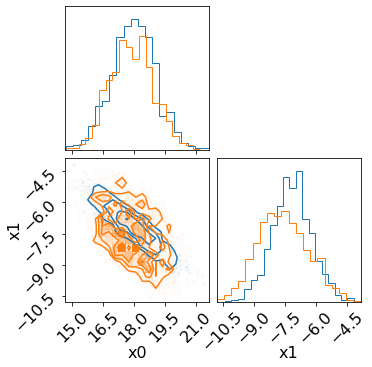

q = 19


<Figure size 432x288 with 0 Axes>

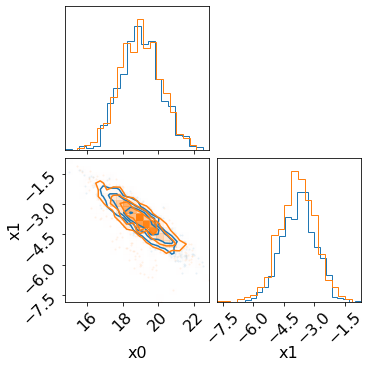

In [35]:
for q in qs:
    print(f"q = {q}")
    plt.figure()
    fig = corner.corner(df_all.query(f'q=={q}')[['x0','x1']], color='C0');
    corner.corner(samples.query(f'q=={q}')[['x0','x1']], color='C1', fig=fig);
    plt.show()
    plt.close()

In [36]:
# conditional
# https://jfcrenshaw.github.io/pzflow/tutorials/conditional_demo/

In [37]:
import jax.numpy as jnp
from pzflow import Flow

In [38]:
df_all

x0        x1   q
0    -1.362299 -0.378386   0
1     1.476938  1.961018   0
2    -0.658729 -1.108871   0
3     1.132815  0.962112   0
4    -0.350594 -0.956324   0
..         ...       ...  ..
995  17.209122 -2.586899  19
996  19.395993 -4.710890  19
997  18.122329 -2.980905  19
998  20.259011 -4.750051  19
999  20.320220 -4.397210  19

[20000 rows x 3 columns]

In [263]:
flow = Flow(data_columns=["x0","x1"], conditional_columns=["q"])

In [264]:
# use this to select a sub-sample of the data for training
# mask = (df_all['q'] > 4) & (df_all['q'] < 10)
# df_all_train = df_all[mask].copy()
# df_all_train.q.unique()

df_all_train = df_all.copy()

In [265]:
losses = flow.train(df_all_train, verbose=True)

Training 100 epochs 
Loss:
(0) 7.0557
(1) 5.7643
(6) 3.7650
(11) 3.1452
(16) 2.4922
(21) 2.3135
(26) 2.2462
(31) 2.1225
(36) 2.1297
(41) 2.0608
(46) 2.0626
(51) 2.1499
(56) 2.0905
(61) 2.0654
(66) 2.1213
(71) 2.0476
(76) 2.0520
(81) 2.0265
(86) 2.0188
(91) 2.0547
(96) 2.0292
(100) 2.0558


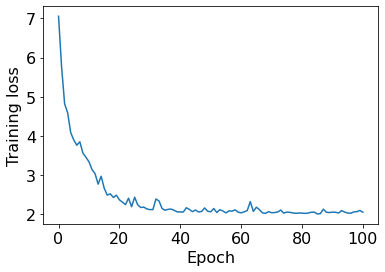

In [266]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.show()

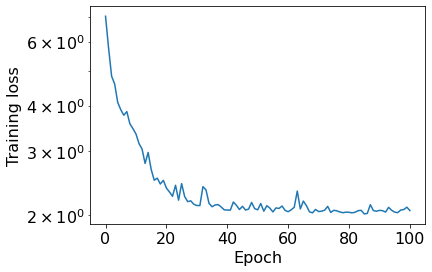

In [267]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.yscale('log')
plt.show()

In [268]:
df_all[:1]

x0        x1  q
0 -1.362299 -0.378386  0

In [269]:
df_all[:1]

x0        x1  q
0 -1.362299 -0.378386  0

In [270]:
# samples = flow.sample(1000, conditions=df_all[:1], seed=0)
# samples = flow.sample(1000, conditions=pd.DataFrame({'q':[2]}), seed=0)

In [271]:
qs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [272]:
samples = []
for q in qs:
    # n = len(df_all.query(f'q == {q}'))
    n = 1000
    samples_ = flow.sample(n, conditions=pd.DataFrame({'q':[q]}), seed=0)
    samples.append(samples_)
samples = pd.concat(samples)

In [273]:
samples['q'] = samples['q'].apply(round)

In [274]:
samples

x0        x1   q
0    0.222548  0.088815   0
0   -1.097533 -0.641543   0
0   -1.681445 -0.936553   0
0   -0.818935 -0.803751   0
0   -1.607281 -1.803514   0
..        ...       ...  ..
0   17.470390 -2.574187  19
0   19.647726 -4.121027  19
0   18.866707 -3.323172  19
0   20.054146 -5.064345  19
0   19.290012 -3.390898  19

[20000 rows x 3 columns]

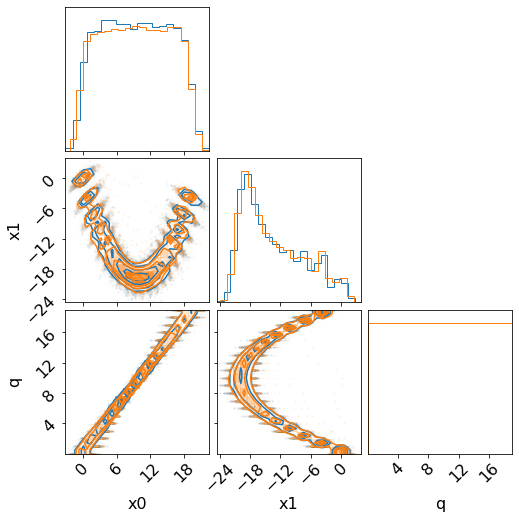

In [275]:
fig = corner.corner(df_all, color='C0');
corner.corner(samples, color='C1', fig=fig);

q = 0


<Figure size 432x288 with 0 Axes>

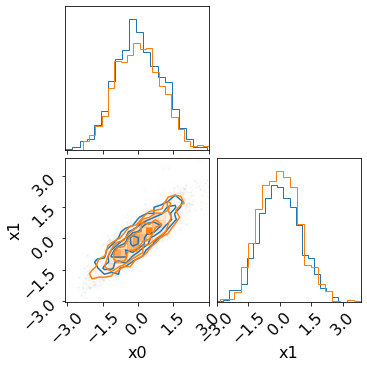

q = 1


<Figure size 432x288 with 0 Axes>

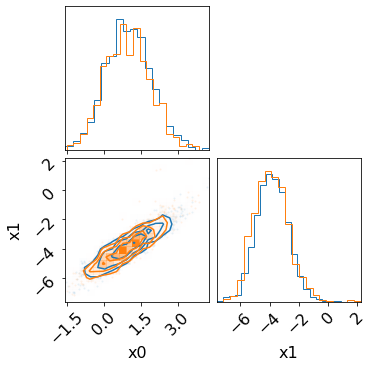

q = 2


<Figure size 432x288 with 0 Axes>

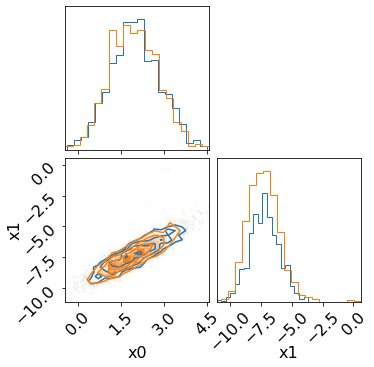

q = 3


<Figure size 432x288 with 0 Axes>

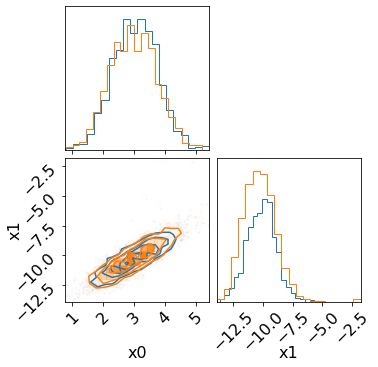

q = 4


<Figure size 432x288 with 0 Axes>

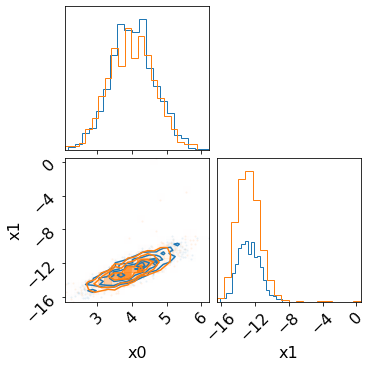

q = 5


<Figure size 432x288 with 0 Axes>

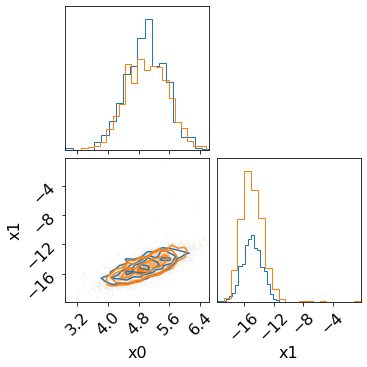

q = 6


<Figure size 432x288 with 0 Axes>

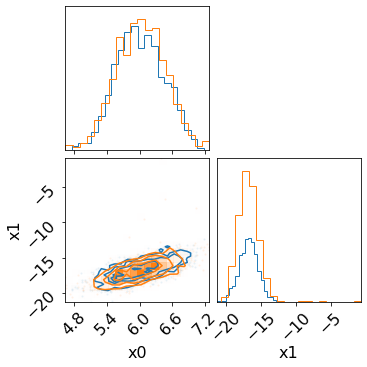

q = 7


<Figure size 432x288 with 0 Axes>

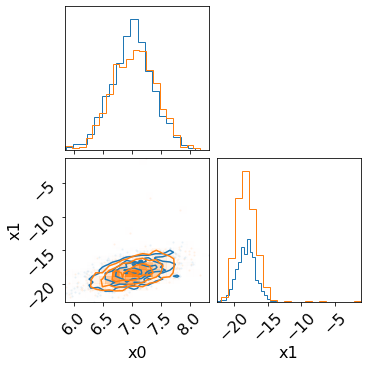

q = 8


<Figure size 432x288 with 0 Axes>

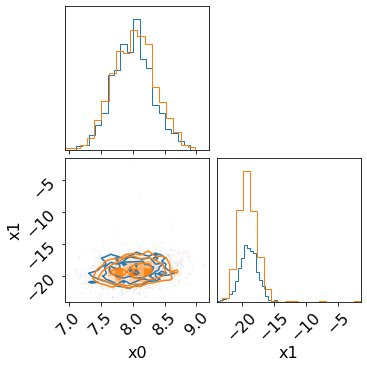

q = 9


<Figure size 432x288 with 0 Axes>

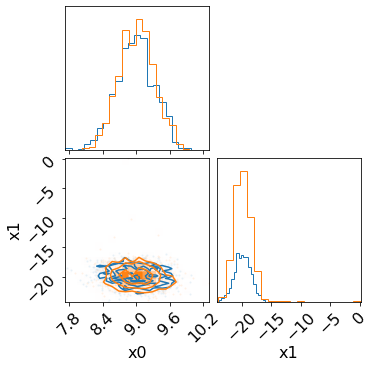

q = 10


<Figure size 432x288 with 0 Axes>

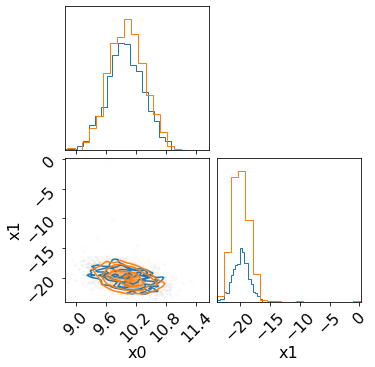

q = 11


<Figure size 432x288 with 0 Axes>

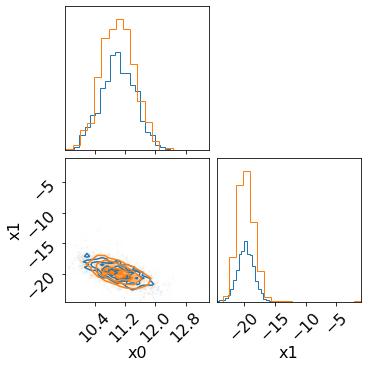

q = 12


<Figure size 432x288 with 0 Axes>

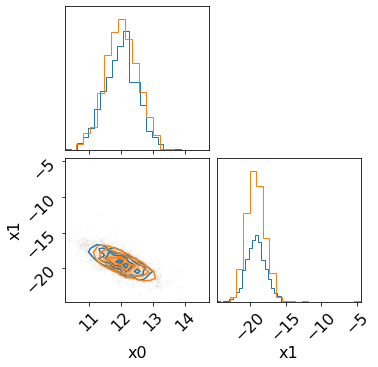

q = 13


<Figure size 432x288 with 0 Axes>

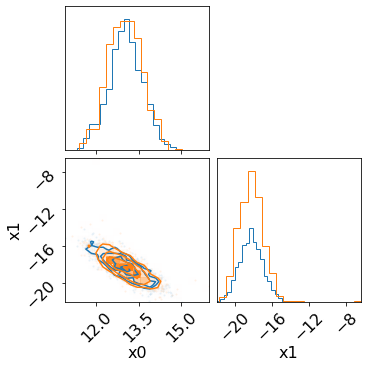

q = 14


<Figure size 432x288 with 0 Axes>

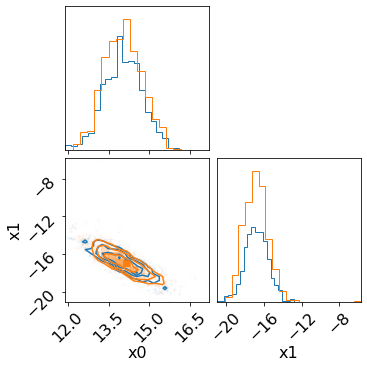

q = 15


<Figure size 432x288 with 0 Axes>

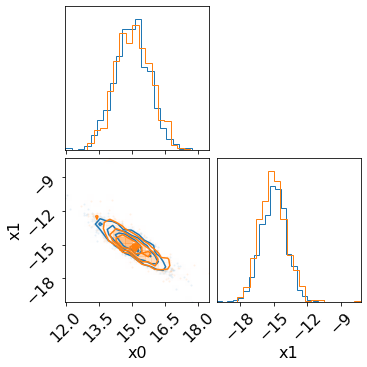

q = 16


<Figure size 432x288 with 0 Axes>

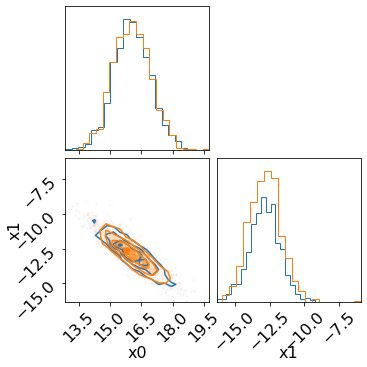

q = 17


<Figure size 432x288 with 0 Axes>

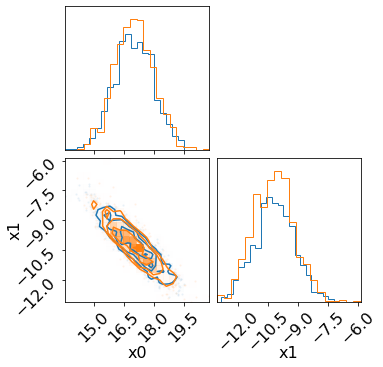

q = 18


<Figure size 432x288 with 0 Axes>

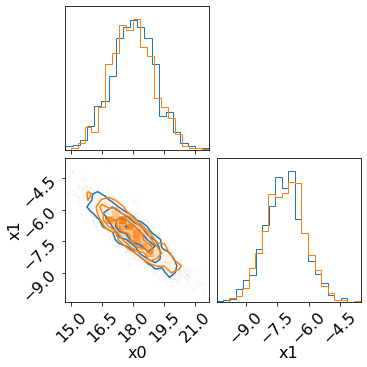

q = 19


<Figure size 432x288 with 0 Axes>

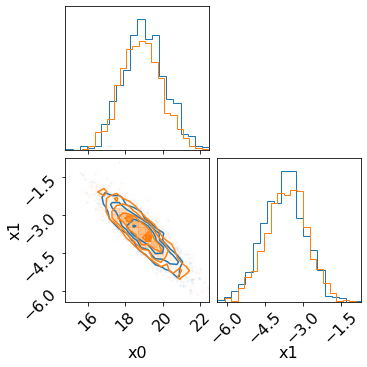

In [276]:
for q in qs:
    print(f"q = {q}")
    plt.figure()
    fig = corner.corner(df_all.query(f'q=={q}')[['x0','x1']], color='C0');
    corner.corner(samples.query(f'q=={q}')[['x0','x1']], color='C1', fig=fig);
    plt.show()
    plt.close()

In [277]:
# qs_test = np.linspace(-1, 4, 1000)
# qs_test = np.arange(-1, 4, 0.1)
qs_test_0 = np.array([0,1,2,3])
# qs_test_1 = np.random.uniform(0, 3, 100)
qs_test_1 = np.random.uniform(0, qs[-1] + 1, 100)
qs_test = np.concatenate((qs_test_0, qs_test_1))
qs_test = np.sort(qs_test)

In [278]:
samples_test = []
n = size
for q in qs_test:
    samples_ = flow.sample(n, conditions=pd.DataFrame({'q':[q]}), seed=1)
    samples_test.append(samples_)
samples_test = pd.concat(samples_test).reset_index(drop=True)



# because the samples returned by pzflow do not EXACTLY
# match the input `qs` we go through
# and replace them so that we can easily compute
# stats in the next cells
for i, q_ in enumerate(samples_test['q'].unique()):
    idx = samples_test.query(f'q == {q_}').index
    samples_test.loc[idx,'q'] = qs_test[i]




In [279]:
samples_test

x0        x1         q
0       -0.026895  0.547611   0.00000
1        0.554227  0.537682   0.00000
2       -1.789225 -2.371722   0.00000
3        0.299686  0.393273   0.00000
4        0.086692  0.278409   0.00000
...           ...       ...       ...
103995  19.747772 -1.502275  19.85736
103996  20.396229 -1.084550  19.85736
103997  18.693626 -0.520118  19.85736
103998  20.461697 -1.697133  19.85736
103999  21.276539 -1.890814  19.85736

[104000 rows x 3 columns]

In [280]:
vs = []
for q in qs_test:
    v = samples_test.query(f"q == {q}")[['x0','x1']].values
    vs.append(v)
    
vs = np.array(vs)
values_mean = np.mean(vs, 1)
values_median = np.percentile(vs, 50, 1)

values_5 = np.percentile(vs, 5, 1)
values_95 = np.percentile(vs, 95, 1)

values_10 = np.percentile(vs, 10, 1)
values_90 = np.percentile(vs, 90, 1)

In [281]:
# [v.shape[0] for v in vs]

In [282]:
# np.argmin([v.shape[0] for v in vs])

In [283]:
values_median.shape

(104, 2)

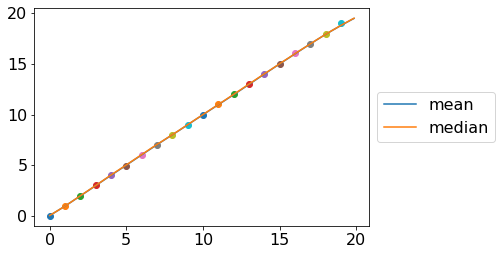

In [284]:
plt.plot(qs_test, values_mean[:,0], label='mean')
plt.plot(qs_test, values_median[:,0], label='median')
# plt.fill_between(qs_test, y1=values_5[:,0], y2=values_95[:,0], alpha=0.5)

for q in qs:
    v_ = np.mean(df_all.query(f'q=={q}')['x0'].values)
    # min_=np.min(df_all.query(f'q=={q}')['x0'].values)
    # max_=np.max(df_all.query(f'q=={q}')['x0'].values)
    # plt.errorbar(q, y=v_, yerr=[[v_-min_], [max_-v_]], fmt='o', capsize=10)
    plt.scatter(q, v_)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

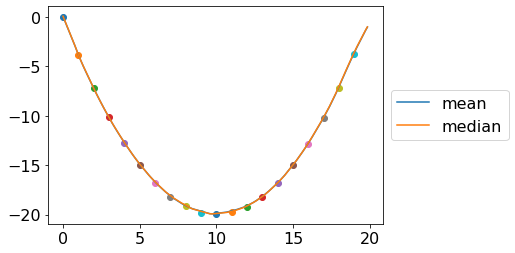

In [285]:
plt.plot(qs_test, values_mean[:,1], label='mean')
plt.plot(qs_test, values_median[:,1], label='median')
# plt.fill_between(qs_test, y1=values_5[:,1], y2=values_95[:,1], alpha=0.5)


for q in qs:
    v_ = np.mean(df_all.query(f'q=={q}')['x1'].values)
#     min_=np.min(df_all.query(f'q=={q}')['x1'].values)
#     max_=np.max(df_all.query(f'q=={q}')['x1'].values)
#     plt.errorbar(q, y=v_, yerr=[[v_-min_], [max_-v_]], fmt='o', capsize=10)
    plt.scatter(q, v_)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

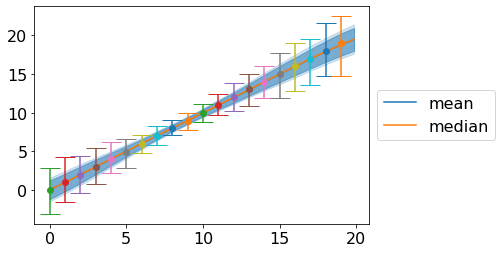

In [286]:
plt.plot(qs_test, values_mean[:,0], label='mean')
plt.plot(qs_test, values_median[:,0], label='median')
plt.fill_between(qs_test, y1=values_5[:,0], y2=values_95[:,0], alpha=0.2, color='C0')
plt.fill_between(qs_test, y1=values_10[:,0], y2=values_90[:,0], alpha=0.5, color='C0')

for q in qs:
    v_ = np.mean(df_all.query(f'q=={q}')['x0'].values)
    min_=np.min(df_all.query(f'q=={q}')['x0'].values)
    max_=np.max(df_all.query(f'q=={q}')['x0'].values)
    plt.errorbar(q, y=v_, yerr=[[v_-min_], [max_-v_]], fmt='o', capsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

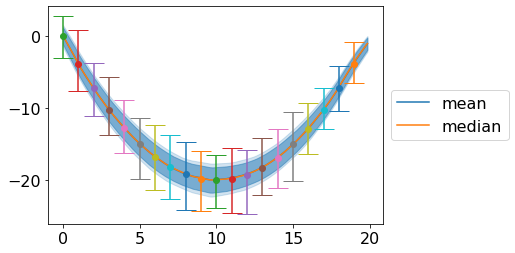

In [287]:
plt.plot(qs_test, values_mean[:,1], label='mean')
plt.plot(qs_test, values_median[:,1], label='median')
plt.fill_between(qs_test, y1=values_5[:,1], y2=values_95[:,1], alpha=0.2, color='C0')
plt.fill_between(qs_test, y1=values_10[:,1], y2=values_90[:,1], alpha=0.5, color='C0')


for q in qs:
    v_ = np.mean(df_all.query(f'q=={q}')['x1'].values)
    min_=np.min(df_all.query(f'q=={q}')['x1'].values)
    max_=np.max(df_all.query(f'q=={q}')['x1'].values)
    plt.errorbar(q, y=v_, yerr=[[v_-min_], [max_-v_]], fmt='o', capsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [288]:
vs.shape

(104, 1000, 2)

In [289]:
vs[0]

array([[-0.02689457,  0.54761124],
       [ 0.5542269 ,  0.5376816 ],
       [-1.7892246 , -2.3717222 ],
       ...,
       [-0.17173195,  0.21437454],
       [ 0.2686901 , -0.13190937],
       [ 1.0595093 ,  0.4883051 ]], dtype=float32)

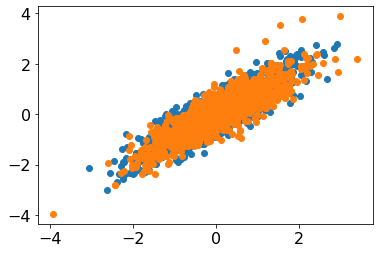

In [290]:
plt.scatter(df_all.query('q==0')['x0'], df_all.query('q==0')['x1'])
plt.scatter(samples_test.query('q==0')['x0'], samples_test.query('q==0')['x1'])